# Outliers 
Z-Score and IQR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
import pickle

#Read a pickle file and load the data
with open('2_germany_eda.pkl', 'rb') as file:
    df = pickle.load(file)

In [24]:
df.shape

(39411, 70)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   address                            39411 non-null  object 
 5   latitude                           39411 non-null  float64
 6   longitude                          39411 non-null  float64
 7   claimed                            39287 non-null  float64
 8   popularity_generic                 39411 non-null  object 
 9   top_tags                           39411 non-null  object 
 10  price_level                        0 non-null      float64
 11  cuisines                           37312 non-null  object 


# Outlier Detection
 
### Graphical methods

Creating data set of continuous data

In [26]:
df.columns

Index(['index', 'restaurant_name', 'region', 'city', 'address', 'latitude',
       'longitude', 'claimed', 'popularity_generic', 'top_tags', 'price_level',
       'cuisines', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week', 'avg_rating', 'total_reviews_count',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords', 'clean_text', 'open_weekends', 'open_mon', 'open_tue',
       'open_wed', 'open_thu', 'open_fri', 'open_sat', 'open_sun',
       'open_morning', 'open_noon', 'open_afternoon', 'open_evening',
       'open_late', 'michelin', 'travellers_choice',
       'certificate_of_excellence', 'awards_num', 'awards_any', 'awards_level',
       'awards_latest_year', 'awards_factor', 'price_range', 'features_num',
       'cuisines_num', 'afterhours', 'breakfast', 'brunch', 'din

### Continuous Numeric Columns

In [27]:
# Convert 'awards_level' to numeric, leaving NaN for missing or non-numeric values
df['awards_level'] = pd.to_numeric(df['awards_level'], errors='coerce')

# Convert to integer type, keeping NaN as is
df['awards_level'] = df['awards_level'].astype('Int64')

df['awards_level'].value_counts()

awards_level
0    26691
1     7082
2     4399
3     1239
Name: count, dtype: Int64

In [28]:
#continuous Numeric Columns
con_df = [
        'latitude', 'longitude',
        'open_days_per_week',
        'open_hours_per_week',
        'working_shifts_per_week',
        'total_reviews_count',
        'reviews_count_in_default_language', 
        'awards_num', 
        'awards_level', 'awards_latest_year', 'awards_factor',
        'features_num', 'cuisines_num', 'price_range',
       'special_diets_num']
con_df = df[con_df]

### Normality Test

### Graphical Method

In [29]:
# Importing scipy stats and zscore libreries
from scipy import stats
from scipy.stats import zscore

In [30]:
# Convert to numeric, non-numeric values become NaN
latitude_numeric = pd.to_numeric(df['latitude'], errors='coerce')

# Check which rows are non-numeric
latitude_non_numeric_values = df['latitude'][latitude_numeric.isna()]
print(latitude_non_numeric_values)
df['latitude'] = df['latitude'].astype(float)

Series([], Name: latitude, dtype: float64)


In [31]:
# Convert to numeric, non-numeric values become NaN
longitude_numeric = pd.to_numeric(df['longitude'], errors='coerce')

# Check which rows are non-numeric
longitude_non_numeric_values = df['longitude'][longitude_numeric.isna()]
print(longitude_non_numeric_values)
df['longitude'] = df['longitude'].astype(float)

Series([], Name: longitude, dtype: float64)


In [32]:
con_df['latitude'] = df['latitude']
con_df['longitude'] = df['longitude']

In [33]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           39411 non-null  float64
 1   longitude                          39411 non-null  float64
 2   open_days_per_week                 27483 non-null  float64
 3   open_hours_per_week                27483 non-null  float64
 4   working_shifts_per_week            27483 non-null  float64
 5   total_reviews_count                39411 non-null  float64
 6   reviews_count_in_default_language  39411 non-null  float64
 7   awards_num                         39411 non-null  float64
 8   awards_level                       39411 non-null  Int64  
 9   awards_latest_year                 39411 non-null  int64  
 10  awards_factor                      39411 non-null  int64  
 11  features_num                       5198 non-null   Int64  


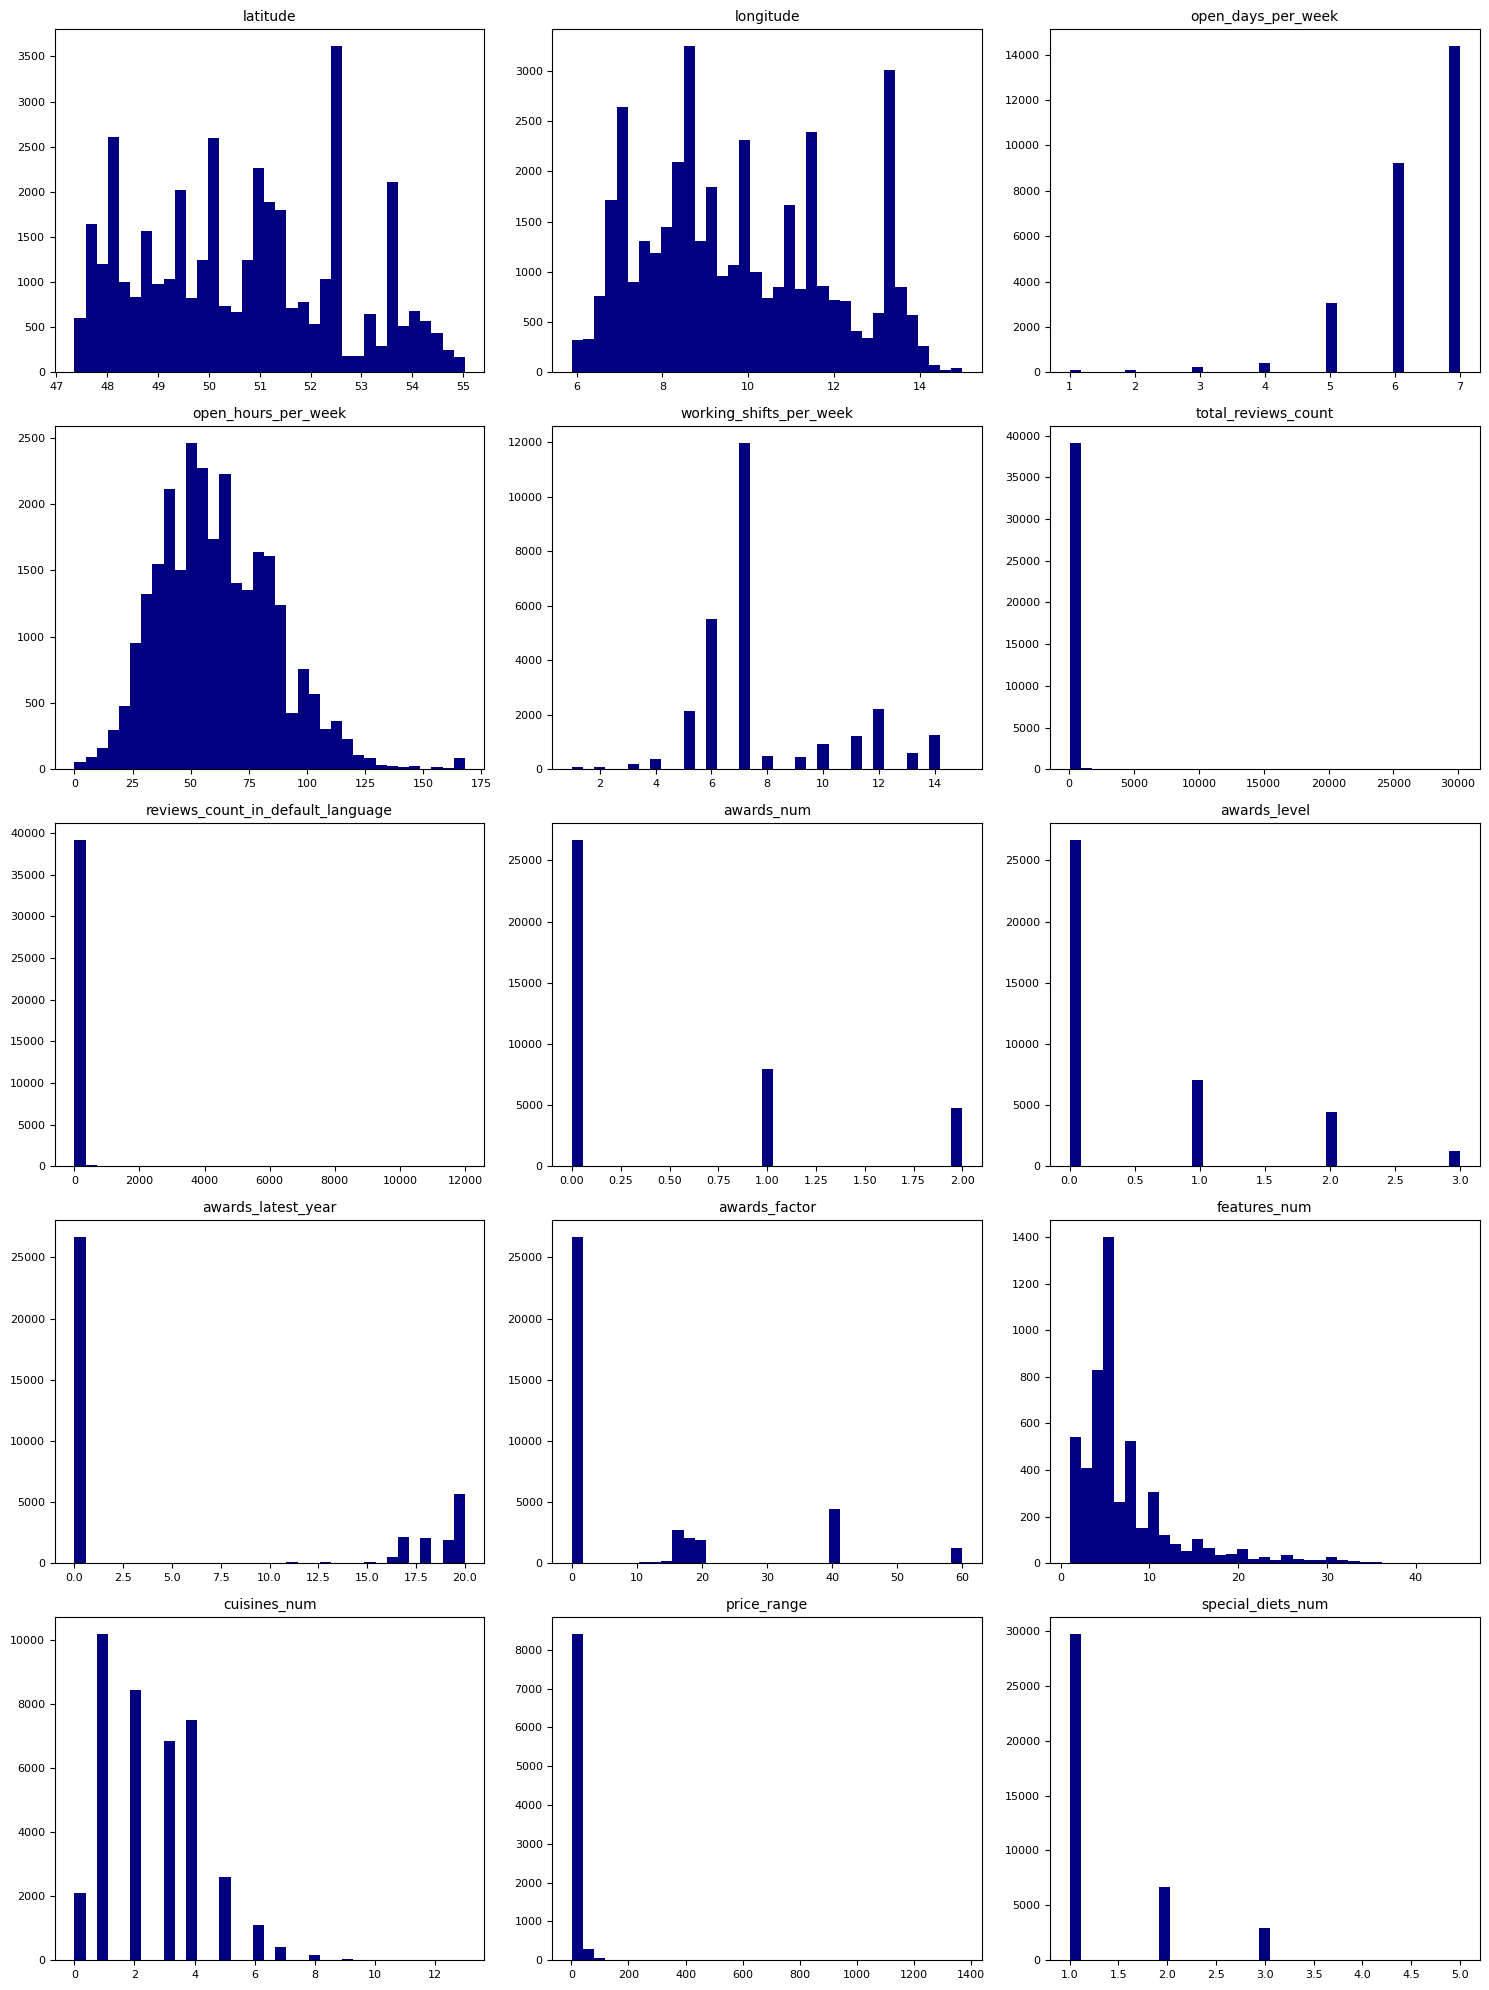

In [34]:
import matplotlib.pyplot as plt
import math

# Number of columns to display per row
ncols = 3
n_features = len(con_df.columns)
nrows = math.ceil(n_features / ncols)  # compute number of rows needed

# Create subplots grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))

# Flatten axes array for easy indexing (in case it's 2D)
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(con_df.columns):
    axes[i].hist(con_df[col], bins=35, color="navy")
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Turn off any unused axes if number of features isn't a multiple of 3
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### open_hours_per_week  - is potentially a paramteric feature

### Mathematical Methods

In [35]:
import pandas as pd
from scipy.stats import shapiro

# 1️⃣ Select only numeric columns
numeric_features = con_df.select_dtypes(include=['int64', 'float64']).columns

# 2️⃣ Create empty lists
numeric_normal_features = []
numeric_non_normal_features = []

# 3️⃣ Loop through numeric columns and test for normality
for col in numeric_features:
    # Drop NaNs to avoid errors
    data = df[col].dropna()

    # Skip columns with very few values (Shapiro requires n >= 3)
    if len(data) < 3:
        continue

    # Perform Shapiro–Wilk test
    stat, p = shapiro(data)

    # Interpretation
    if p > 0.05:
        numeric_normal_features.append(col)        # p > 0.05 → normal 
    else:
        numeric_non_normal_features.append(col)    # p < 0.05 → not normal

# 4️⃣ Print results
print("✅ Normally distributed numeric features:")
print(numeric_normal_features)

print("\n⚠️ Non-normally distributed numeric features:")
print(numeric_non_normal_features)


✅ Normally distributed numeric features:
[]

⚠️ Non-normally distributed numeric features:
['latitude', 'longitude', 'open_days_per_week', 'open_hours_per_week', 'working_shifts_per_week', 'total_reviews_count', 'reviews_count_in_default_language', 'awards_num', 'awards_level', 'awards_latest_year', 'awards_factor', 'features_num', 'cuisines_num', 'price_range', 'special_diets_num']


#### All contininous features are assigned as non parametric.

In [36]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           39411 non-null  float64
 1   longitude                          39411 non-null  float64
 2   open_days_per_week                 27483 non-null  float64
 3   open_hours_per_week                27483 non-null  float64
 4   working_shifts_per_week            27483 non-null  float64
 5   total_reviews_count                39411 non-null  float64
 6   reviews_count_in_default_language  39411 non-null  float64
 7   awards_num                         39411 non-null  float64
 8   awards_level                       39411 non-null  Int64  
 9   awards_latest_year                 39411 non-null  int64  
 10  awards_factor                      39411 non-null  int64  
 11  features_num                       5198 non-null   Int64  


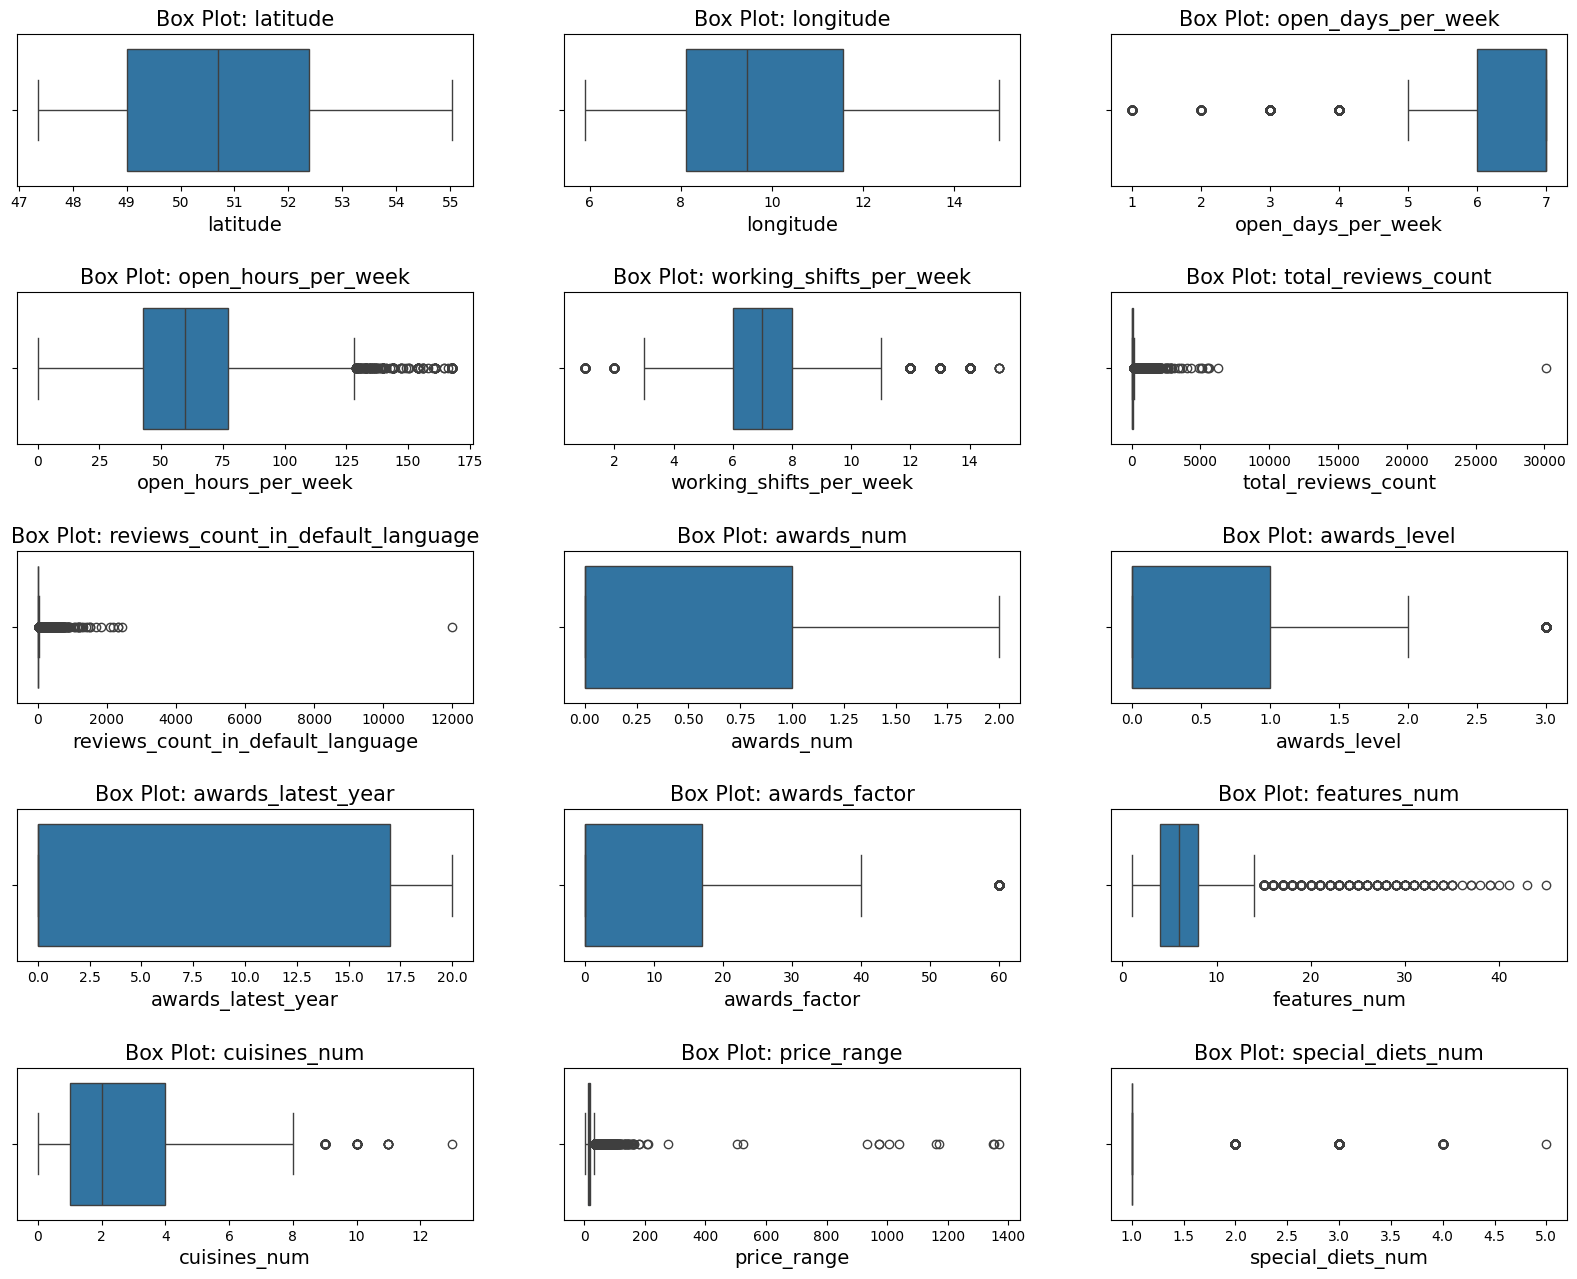

In [37]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(con_df)

#### IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [38]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in con_df:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(con_df).sort_values('Percent', ascending=False)
outliers_df

# Outlier count: The number of outliers in each column.
# Percent: The percentage of outliers in each column.

,Outlier count,Percent
special_diets_num,9669.0,24.533760
working_shifts_per_week,4258.0,10.804090
total_reviews_count,3843.0,9.751085
reviews_count_in_default_language,3321.0,8.426581
awards_level,1239.0,3.143792
awards_factor,1239.0,3.143792
open_days_per_week,802.0,2.034965
price_range,632.0,1.603613
features_num,513.0,1.301667
open_hours_per_week,225.0,0.570907


### Labeling every outlier with 'Outlier'

In [39]:
def outliers(df, outliers_summary):
    label_out_df = df.copy()
    
    for col in df.columns:
        if col in outliers_summary.index:
            # Compute IQR
            numeric_series = pd.to_numeric(label_out_df[col], errors='coerce')
            Q1 = numeric_series.quantile(0.25)
            Q3 = numeric_series.quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR
            
            # Label outliers, skip NaNs safely
            label_out_df[col] = numeric_series.apply(
                lambda x: 'Outlier' if pd.notna(x) and (x > upper_limit or x < lower_limit) else x
            )
            
    return label_out_df
new_df_outliers = outliers(df, outliers_df)
new_df_outliers.head()


,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy
0,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,1,0,0,1,1,1,0,0,0,Hessigheim
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.765570,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,0,1,1,1,0,0,0,Hamm Sieg
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.426470,8.391160,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,1,0,0,1,1,1,0,0,0,Limburgerhof
3,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.422850,8.393550,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,1,0,1,1,Outlier,1,0,0,0,Limburgerhof
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,1,0,1,1,1,1,0,0,0,Limburgerhof


### Creating df_outliers with dummies

In [40]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### creating df without outliers so we can compare the corr and distribution in both datasets

In [41]:
def capping(df, outliers_summary):
    temp = df.copy()
    
    for col in df.columns:
        if col in outliers_summary.index:
            # Ensure numeric type
            numeric_series = pd.to_numeric(temp[col], errors='coerce')
            
            # Compute IQR limits
            Q1 = numeric_series.quantile(0.25)
            Q3 = numeric_series.quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR
            
            # Replace outliers with NaN safely
            temp[col] = numeric_series.apply(
                lambda x: np.nan if pd.notna(x) and (x > upper_limit or x < lower_limit) else x
            )
    
    return temp

# Example usage
temp = capping(df, outliers_df)
temp.head()



,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy
0,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,1,0,0,1,1.0,1,0,0,0,Hessigheim
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.765570,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,0,1,1.0,1,0,0,0,Hamm Sieg
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.426470,8.391160,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,1,0,0,1,1.0,1,0,0,0,Limburgerhof
3,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.422850,8.393550,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,1,0,1,1,NaN,1,0,0,0,Limburgerhof
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,1,0,1,1,1.0,1,0,0,0,Limburgerhof


### Checking if distribution and/or correlation (spearman) has changed significantly:

In [42]:
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

### A table indicating changes

In [43]:
from scipy.stats import norm, ks_2samp
import numpy as np
import pandas as pd

c = con_df
names = c.columns

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = con_df.copy()
np.seterr(divide='ignore', invalid='ignore')

rows = []  # Collect rows here to avoid repeatedly modifying the DataFrame
for i in names:
    # Data with outliers
    out = df[i]
    # Data without outliers
    non = df[i].loc[df_outliers[i] == 0]
    # Labels with outliers
    survived_out = df['target_value']
    # Labels without outliers
    survived_non = df['target_value'].loc[df_outliers[i] == 0]
    
    # Correlation p-value
    p, pvalue = cocor(out, survived_out, non, survived_non)
    cor_change = np.where(pvalue < 0.05, '+', '-')
    # Outliers count
    mv = df_outliers.sum()
    # KS test p-value
    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')
    
    # Append the data as a dictionary
    rows.append({
        'feature': i,
        'outliers_cnt': mv,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

# Use pd.DataFrame to create out_df from rows
out_df = pd.DataFrame(rows)

# Display the first 10 rows
out_df.head(10)

,feature,outliers_cnt,distribution_changed,correlation_changed
0,latitude,index 0 restaurant_name ...,-,-
1,longitude,index 0 restaurant_name ...,-,-
2,open_days_per_week,index 0 restaurant_name ...,-,-
3,open_hours_per_week,index 0 restaurant_name ...,-,-
4,working_shifts_per_week,index 0 restaurant_name ...,-,-
5,total_reviews_count,index 0 restaurant_name ...,+,-
6,reviews_count_in_default_language,index 0 restaurant_name ...,+,-
7,awards_num,index 0 restaurant_name ...,-,-
8,awards_level,index 0 restaurant_name ...,+,+
9,awards_latest_year,index 0 restaurant_name ...,-,-


In [44]:
# All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
# We don't want to delete vars that will change both corr only
# keeping variables that are sensitive to outliers in both correlation and distribution — 
# maybe because they still carry useful or interpretable information
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+') & (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,latitude,index 0 restaurant_name ...,-,-,yes
1,longitude,index 0 restaurant_name ...,-,-,yes
2,open_days_per_week,index 0 restaurant_name ...,-,-,yes
3,open_hours_per_week,index 0 restaurant_name ...,-,-,yes
4,working_shifts_per_week,index 0 restaurant_name ...,-,-,yes
5,total_reviews_count,index 0 restaurant_name ...,+,-,yes
6,reviews_count_in_default_language,index 0 restaurant_name ...,+,-,yes
7,awards_num,index 0 restaurant_name ...,-,-,yes
8,awards_level,index 0 restaurant_name ...,+,+,no
9,awards_latest_year,index 0 restaurant_name ...,-,-,yes


In [45]:
# Getting relevant columns and features
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,latitude,index 0 restaurant_name ...,-,-,yes
1,longitude,index 0 restaurant_name ...,-,-,yes
2,open_days_per_week,index 0 restaurant_name ...,-,-,yes
3,open_hours_per_week,index 0 restaurant_name ...,-,-,yes
4,working_shifts_per_week,index 0 restaurant_name ...,-,-,yes
5,total_reviews_count,index 0 restaurant_name ...,+,-,yes
6,reviews_count_in_default_language,index 0 restaurant_name ...,+,-,yes
7,awards_num,index 0 restaurant_name ...,-,-,yes
9,awards_latest_year,index 0 restaurant_name ...,-,-,yes
11,features_num,index 0 restaurant_name ...,-,+,yes


In [46]:
# Getting relevant columns and features
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0                              latitude
1                             longitude
2                    open_days_per_week
3                   open_hours_per_week
4               working_shifts_per_week
5                   total_reviews_count
6     reviews_count_in_default_language
7                            awards_num
9                    awards_latest_year
11                         features_num
12                         cuisines_num
13                          price_range
14                    special_diets_num
Name: feature, dtype: object

In [48]:
# List of outlier columns to remove
remove_outliers=[
'latitude', 
'longitude', 
'open_days_per_week', 
'open_hours_per_week', 
'working_shifts_per_week', 
'total_reviews_count', 
'reviews_count_in_default_language', 
'awards_latest_year', 
'features_num', 
'cuisines_num', 
'special_diets_num']

In [49]:
manipulated_data= df.copy()
for j in range(len(df)):
    for col in remove_outliers: 
        col_idx = df_outliers.columns.get_loc(col)
        if df_outliers.iloc[j, col_idx] == 1:
            manipulated_data.iloc[j, col_idx] = 0

In [50]:
manipulated_data

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy
0,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,1,0,0,1,1,1,0,0,0,Hessigheim
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.765570,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,0,1,1,1,0,0,0,Hamm Sieg
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.426470,8.391160,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,1,0,0,1,1,1,0,0,0,Limburgerhof
3,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.422850,8.393550,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,1,0,1,1,0,1,0,0,0,Limburgerhof
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,1,0,1,1,1,1,0,0,0,Limburgerhof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,300390,Joe Peñas,Southern Germany,Schorndorf,Rosenstr 5153 73614 Schorndorf 73614 Schorndor...,48.804780,9.521550,1.0,6 of 57 places to eat in Schorndorf,Midrange Mexican Steakhouse Latin,...,0,0,0,1,1,0,1,0,0,Schorndorf
39409,300392,Burgerstuble,Southern Germany,Schorndorf,Pfarrstr 32 73614 Schorndorf BadenWürttemberg ...,48.795975,9.502259,0.0,2 of 57 places to eat in Schorndorf,Midrange German Vegetarian Friendly,...,1,0,1,1,1,0,1,1,0,Schorndorf
39410,300398,Restaurant Dimitra,Southern Germany,Schorndorf,Gmuender Str 6 73614 Schorndorf BadenWürttembe...,48.805250,9.532570,1.0,11 of 57 places to eat in Schorndorf,Midrange Greek Vegetarian Friendly Vegan Options,...,1,0,1,1,0,1,0,0,0,Schorndorf
39411,300402,Gasthaus Zum Lamm Schornbach,Southern Germany,Schorndorf,Talauenstr 2 73614 Schorndorf BadenWürttemberg...,48.830850,9.511600,0.0,5 of 57 places to eat in Schorndorf,Midrange German South American Vegetarian Frie...,...,1,0,1,1,1,0,1,1,0,Schorndorf


In [51]:
#Checking to see the outlier = yes on manipulated data is gone on df
manipulated_data.loc[df['latitude'] == 'yes']

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy


In [62]:
# !pip install missingno

<Axes: >

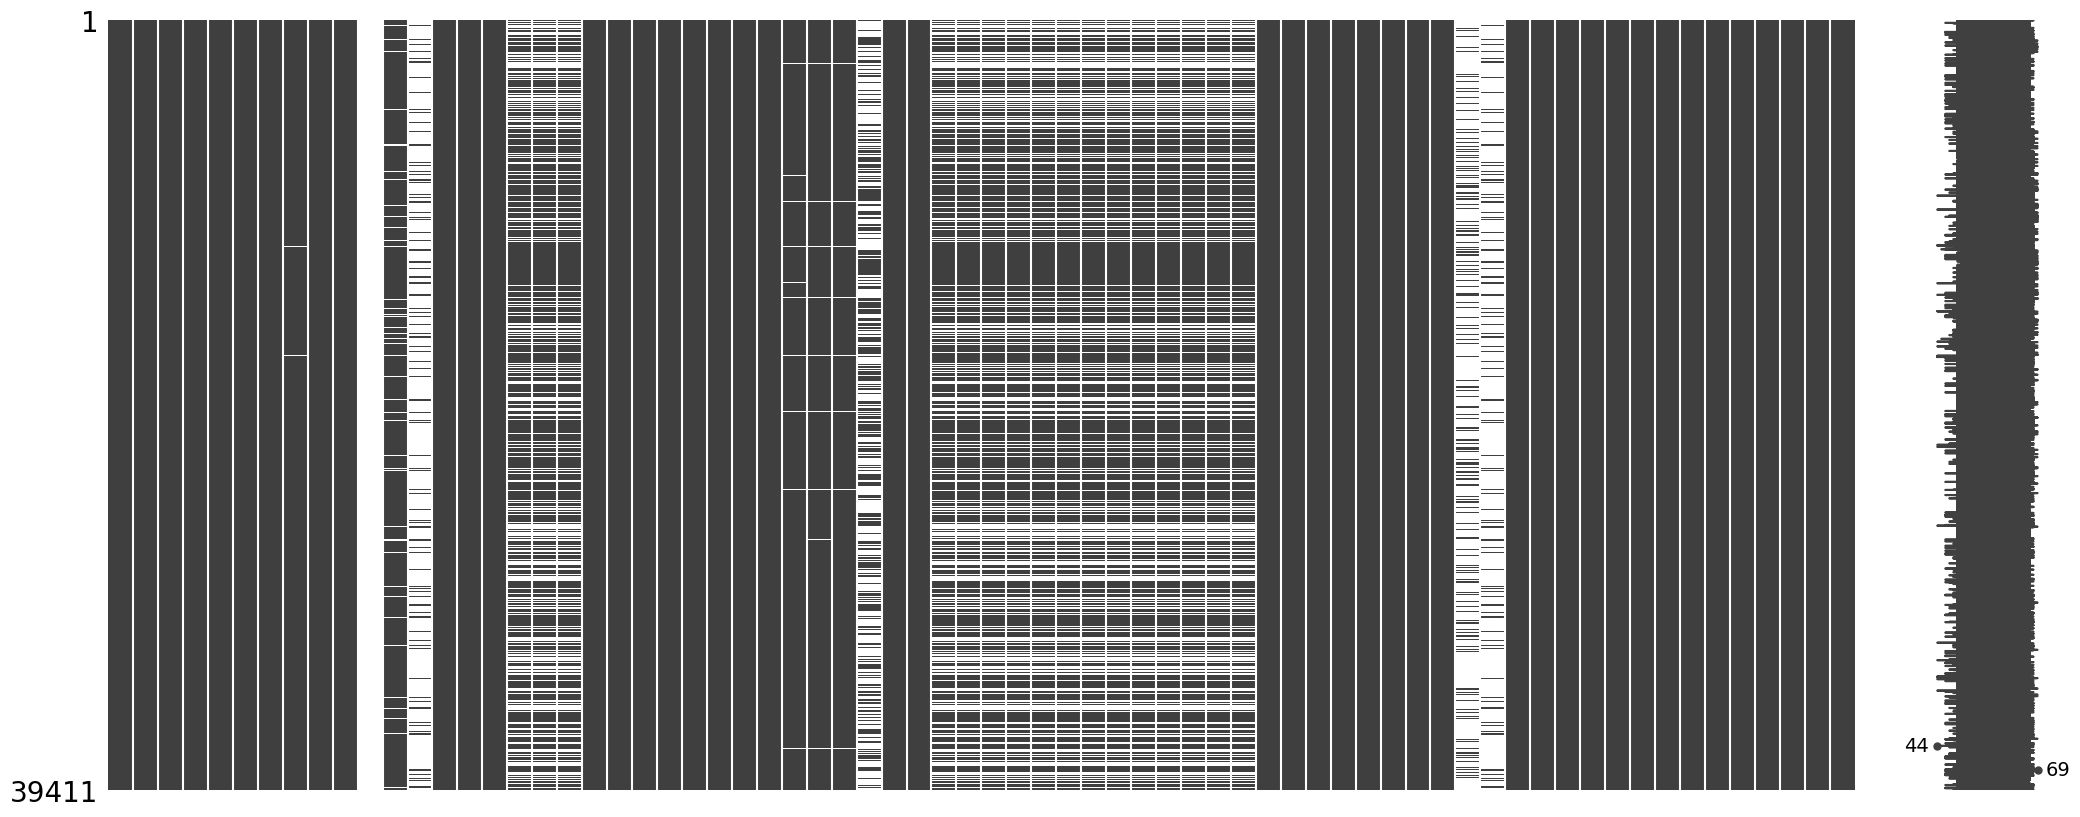

In [52]:
import missingno as msno

msno.matrix(manipulated_data)

### Pickle

In [53]:
manipulated_data.to_pickle('df_3_cleaned.pkl')

In [70]:
cleaned_df = pd.read_pickle('df_3_cleaned.pkl')
cleaned_df

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy
0,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,1,0,0,1,1,1,0,0,0,Hessigheim
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.765570,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,0,1,1,1,0,0,0,Hamm Sieg
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.426470,8.391160,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,1,0,0,1,1,1,0,0,0,Limburgerhof
3,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.422850,8.393550,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,1,0,1,1,0,1,0,0,0,Limburgerhof
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,1,0,1,1,1,1,0,0,0,Limburgerhof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,300390,Joe Peñas,Southern Germany,Schorndorf,Rosenstr 5153 73614 Schorndorf 73614 Schorndor...,48.804780,9.521550,1.0,6 of 57 places to eat in Schorndorf,Midrange Mexican Steakhouse Latin,...,0,0,0,1,1,0,1,0,0,Schorndorf
39409,300392,Burgerstuble,Southern Germany,Schorndorf,Pfarrstr 32 73614 Schorndorf BadenWürttemberg ...,48.795975,9.502259,0.0,2 of 57 places to eat in Schorndorf,Midrange German Vegetarian Friendly,...,1,0,1,1,1,0,1,1,0,Schorndorf
39410,300398,Restaurant Dimitra,Southern Germany,Schorndorf,Gmuender Str 6 73614 Schorndorf BadenWürttembe...,48.805250,9.532570,1.0,11 of 57 places to eat in Schorndorf,Midrange Greek Vegetarian Friendly Vegan Options,...,1,0,1,1,0,1,0,0,0,Schorndorf
39411,300402,Gasthaus Zum Lamm Schornbach,Southern Germany,Schorndorf,Talauenstr 2 73614 Schorndorf BadenWürttemberg...,48.830850,9.511600,0.0,5 of 57 places to eat in Schorndorf,Midrange German South American Vegetarian Frie...,...,1,0,1,1,1,0,1,1,0,Schorndorf


In [72]:
df = pd.read_pickle('df_3_cleaned.pkl')
df

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value,flag,city_copy
0,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,1,0,0,1,1,1,0,0,0,Hessigheim
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.765570,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,0,1,1,1,0,0,0,Hamm Sieg
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.426470,8.391160,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,1,0,0,1,1,1,0,0,0,Limburgerhof
3,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.422850,8.393550,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,1,0,1,1,0,1,0,0,0,Limburgerhof
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,1,0,1,1,1,1,0,0,0,Limburgerhof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,300390,Joe Peñas,Southern Germany,Schorndorf,Rosenstr 5153 73614 Schorndorf 73614 Schorndor...,48.804780,9.521550,1.0,6 of 57 places to eat in Schorndorf,Midrange Mexican Steakhouse Latin,...,0,0,0,1,1,0,1,0,0,Schorndorf
39409,300392,Burgerstuble,Southern Germany,Schorndorf,Pfarrstr 32 73614 Schorndorf BadenWürttemberg ...,48.795975,9.502259,0.0,2 of 57 places to eat in Schorndorf,Midrange German Vegetarian Friendly,...,1,0,1,1,1,0,1,1,0,Schorndorf
39410,300398,Restaurant Dimitra,Southern Germany,Schorndorf,Gmuender Str 6 73614 Schorndorf BadenWürttembe...,48.805250,9.532570,1.0,11 of 57 places to eat in Schorndorf,Midrange Greek Vegetarian Friendly Vegan Options,...,1,0,1,1,0,1,0,0,0,Schorndorf
39411,300402,Gasthaus Zum Lamm Schornbach,Southern Germany,Schorndorf,Talauenstr 2 73614 Schorndorf BadenWürttemberg...,48.830850,9.511600,0.0,5 of 57 places to eat in Schorndorf,Midrange German South American Vegetarian Frie...,...,1,0,1,1,1,0,1,1,0,Schorndorf


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   address                            39411 non-null  object 
 5   latitude                           39411 non-null  float64
 6   longitude                          39411 non-null  float64
 7   claimed                            39287 non-null  float64
 8   popularity_generic                 39411 non-null  object 
 9   top_tags                           39411 non-null  object 
 10  price_level                        0 non-null      float64
 11  cuisines                           37312 non-null  object 


In [56]:
# Check
from scipy.stats import shapiro
stat, p = shapiro(df['open_hours_per_week'])
if p > 0.05:
    print("Normal-ish")  # OK to use Z-score
else:
    print("Not normal")  # Better to use IQR

Not normal


In [57]:
# Check
from scipy.stats import shapiro
stat, p = shapiro(df['special_diets_num'])
if p > 0.05:
    print("Normal-ish")  # OK to use Z-score
else:
    print("Not normal")  # Better to use IQR

Not normal


In [58]:
df['target_value'].value_counts()

target_value
0    25125
1    14286
Name: count, dtype: int64

In [59]:
con_df.columns.tolist()

['latitude',
 'longitude',
 'open_days_per_week',
 'open_hours_per_week',
 'working_shifts_per_week',
 'total_reviews_count',
 'reviews_count_in_default_language',
 'awards_num',
 'awards_level',
 'awards_latest_year',
 'awards_factor',
 'features_num',
 'cuisines_num',
 'price_range',
 'special_diets_num']

### Exploring number of competitors in a city

In [63]:
#  'city' column

# Count number of restaurants per city
city_counts = df.groupby('city')['restaurant_name'].count()

# Average rating per city
city_avg_rating = df.groupby('city')['avg_rating'].mean()

# Combine into one DataFrame
city_summary = pd.DataFrame({
    'num_restaurants': city_counts,
    'avg_rating': city_avg_rating
})

# Check correlation
city_summary.corr()

,num_restaurants,avg_rating
num_restaurants,1.000000,-0.020336
avg_rating,-0.020336,1.000000


In [64]:
city_summary = pd.DataFrame({
    'num_restaurants': city_counts,
    'avg_rating': city_avg_rating
})
city_summary[['num_restaurants', 'avg_rating']].head(10)


,num_restaurants,avg_rating
city,,
Aachen,233,4.030043
Aalen,31,4.112903
Abenberg,1,3.500000
Abensberg,5,4.200000
Abstatt,2,4.500000
Achberg,1,4.500000
Achern,13,4.230769
Achim,6,3.833333
Achkarren,1,4.500000


#### No corr between number of competitors in the city and average_rating.

In [65]:
import pandas as pd
from scipy.stats import ttest_ind

# --- Step 1: Count number of restaurants per city ---
city_counts = df.groupby('city')['restaurant_name'].count().reset_index()
city_counts.rename(columns={'restaurant_name': 'num_restaurants'}, inplace=True)

# --- Step 2: Merge with target_value ---
# Assuming df has 'city' and 'target_value' columns
city_counts_target = df[['city', 'target_value']].drop_duplicates()
city_summary = pd.merge(city_counts, city_counts_target, on='city')

# --- Step 3: Split into two groups ---
group0 = city_summary[city_summary['target_value'] == 0]['num_restaurants']
group1 = city_summary[city_summary['target_value'] == 1]['num_restaurants']

# --- Step 4: Perform t-test ---
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.6045085267887897
P-value: 0.5455309229894607


#### No significant difference between mean of competitors in a city among high rated restaurants and low rated.

### Missing Values

In [74]:
# Count missing values per column
missing_summary = (
    df.isnull().sum()
      .loc[lambda x: x > 0]           # Keep only columns with missing values
      .sort_values(ascending=False)   # Sort descending
)

# Combine missing counts with dtypes
missing_summary = (
    pd.DataFrame({
        'missing_count': missing_summary,
        'dtype': df.dtypes[missing_summary.index]
    })
)

missing_summary

,missing_count,dtype
price_level,39411,float64
features,34213,object
features_num,34213,Int64
price_range,30588,Int64
atmosphere,23663,float64
open_hours_per_week,11928,float64
open_weekends,11928,float64
open_days_per_week,11928,float64
working_shifts_per_week,11928,float64
open_wed,11928,float64


In [43]:
#### No Impute
#### features, cuisines - text columns 
#### atmosphere, food, value, service - leaky columns, kept for EDA only

#### To Impute
#### open_days_per_week, working_shifts_per_week, open_hours_per_week 

features_num
price_range
working_shifts_per_week
open_hours_per_week
open_days_per_week

open_weekends
open_wed
open_sat
open_fri
open_sun
open_morning
open_afternoon
open_thu
open_mon
open_tue
open_late
open_noon
open_evening
claimed



#### claimed

In [ ]:
#### price_level - a subjective feature - dropping

In [68]:
df = df.drop(columns=['price_level'])


In [26]:
# !pip install fancyimpute

In [75]:
from sklearn.impute import KNNImputer

# Impute missing values in binary columns with KNN
binary_columns = [
    'open_weekends', 'open_days_per_week',
    'open_wed', 'open_sat', 'open_fri', 'open_sun',
    'open_morning', 'open_afternoon', 'open_thu', 
    'open_mon', 'open_tue', 'open_late', 'open_noon', 'open_evening', 'claimed'
]

# Create a KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=1)

# Fit the KNN imputer to the binary columns
df[binary_columns] = knn_imputer.fit_transform(df[binary_columns])

### Continuos Columns

### High missing % columns drop

In [105]:
# Calculate the percentage of missing values in 'features_num' column
missing_percentage = df['features_num'].isnull().mean() * 100

# Print the result
print(f"Percentage of missing values in 'features_num': {missing_percentage:.2f}%")

Percentage of missing values in 'features_num': 86.81%


In [106]:
df = df.drop(columns='features_num', errors='ignore')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   cuisines                           37312 non-null  object 
 9   features                           5198 non-null   object 
 10  vegetarian_friendly                39411 non-null  Int64  
 11  vegan_options                      39411 non-null  Int64  


In [ ]:
### Impute by MICE

Numeric columns to impute:
Index(['price_range', 'working_shifts_per_week', 'open_hours_per_week'], dtype='object')


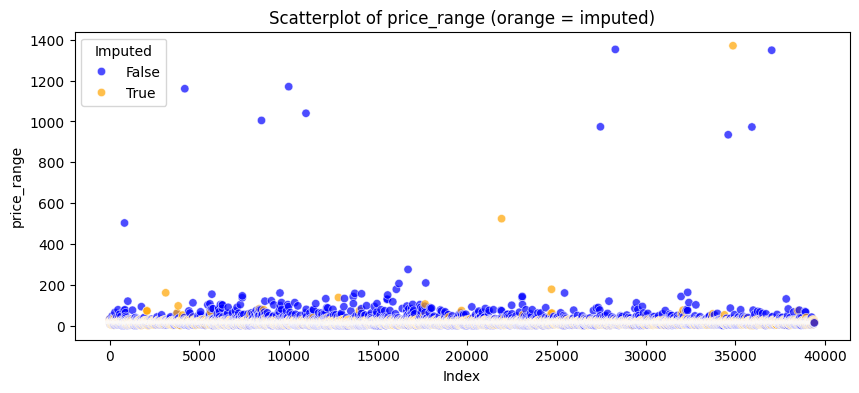

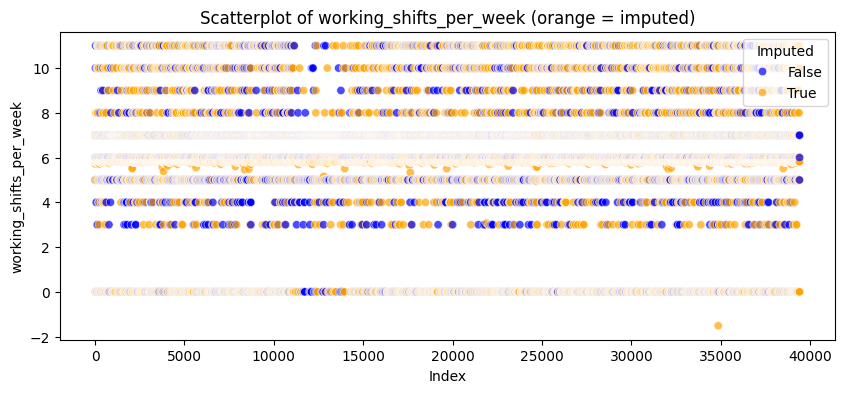

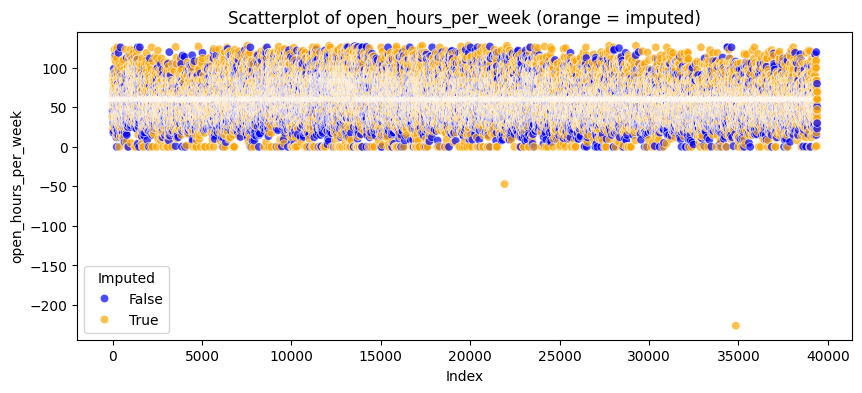

In [112]:
import pandas as pd
from fancyimpute import IterativeImputer  # MICE implementation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select only the features you want ---
features_to_impute = ['price_range', 'working_shifts_per_week', 'open_hours_per_week']

# Keep only numeric features from that list
X = df[features_to_impute].select_dtypes(exclude='object')

# Keep only columns that actually have missing values
X = X.loc[:, X.isnull().any()]

print("Numeric columns to impute:")
print(X.columns)

# --- Step 2: MICE Imputation ---
# Initialize IterativeImputer with add_indicator=True to keep track of imputed values
imputer = IterativeImputer(max_iter=15, add_indicator=True)

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Convert the result into a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns.tolist() + [col + "_indicator" for col in X.columns], index=X.index)

# --- Step 3: Create mask for imputed values ---
# Indicator columns are created by the IterativeImputer, so we check for imputed values in the indicator columns
indicator_columns = [col + "_indicator" for col in X.columns]
imputed_mask = X_imputed_df[indicator_columns].any(axis=1)  # True where any feature in the row was imputed

# --- Step 4: Scatterplots for each feature ---
for col in X.columns:  # Loop through only the original features (not the indicator columns)
    plt.figure(figsize=(10, 4))
    sns.scatterplot(
        x=X_imputed_df.index, 
        y=X_imputed_df[col],
        hue=imputed_mask,  # Use the imputed mask to highlight imputed values
        palette={False: 'blue', True: 'orange'},
        alpha=0.7
    )
    plt.title(f'Scatterplot of {col} (orange = imputed)')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend(title='Imputed')
    plt.show()


In [113]:
# Update df with the imputed values (from X_imputed_df)
df[features_to_impute] = X_imputed_df[features_to_impute]

# Optionally, you can also drop the indicator columns if you don't need them
df = df.drop(columns=[col + "_indicator" for col in features_to_impute])

# Verify if the missing values are now imputed
print(df[features_to_impute].isnull().sum())

KeyError: "['price_range_indicator', 'working_shifts_per_week_indicator', 'open_hours_per_week_indicator'] not found in axis"

In [114]:
print(X_imputed_df.columns)


Index(['price_range', 'working_shifts_per_week', 'open_hours_per_week',
       'price_range_indicator', 'working_shifts_per_week_indicator',
       'open_hours_per_week_indicator'],
      dtype='object')


In [115]:
# Update df with the imputed values (from X_imputed_df)
df[features_to_impute] = X_imputed_df[features_to_impute]

# Drop indicator columns (those with '_indicator' suffix) from the df
indicator_columns = [col + "_indicator" for col in features_to_impute]
df = df.drop(columns=[col for col in indicator_columns if col in df.columns])

# Verify if the missing values are now imputed
print(df[features_to_impute].isnull().sum())

price_range                0
working_shifts_per_week    0
open_hours_per_week        0
dtype: int64


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   cuisines                           37312 non-null  object 
 9   features                           5198 non-null   object 
 10  vegetarian_friendly                39411 non-null  Int64  
 11  vegan_options                      39411 non-null  Int64  


In [117]:
# Count missing values per column
missing_summary = (
    df.isnull().sum()
      .loc[lambda x: x > 0]           # Keep only columns with missing values
      .sort_values(ascending=False)   # Sort descending
)

# Combine missing counts with dtypes
missing_summary = (
    pd.DataFrame({
        'missing_count': missing_summary,
        'dtype': df.dtypes[missing_summary.index]
    })
)

missing_summary

,missing_count,dtype
features,34213,object
cuisines,2099,object


In [ ]:
# No Impute
# features, cuisines - text columns


In [ ]:
### Dropping Leaky, temp, original text columns

In [118]:
# List of columns to drop
leaky_columns = ['atmosphere', 'food', 'value', 'service', 'excellent', 'very_good', 'average', 'poor', 'terrible']
df = df.drop(columns=leaky_columns, errors='ignore')

In [119]:
# List of columns to drop
# 'popularity_generic' - derived from the taget valur formula, leacky
# 'price_level' - a subjective feature about how expensive the price. (price_range is obhective, thus is used for the model)

temp_columns = ['flag', 'city_copy', 'address', 'popularity_generic', 'price_level']
df = df.drop(columns=temp_columns, errors='ignore')


In [120]:
original_text_columns = ['features', 'cuisines']
df = df.drop(columns=original_text_columns, errors='ignore')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   vegetarian_friendly                39411 non-null  Int64  
 9   vegan_options                      39411 non-null  Int64  
 10  gluten_free                        39411 non-null  Int64  
 11  open_days_per_week                 39411 non-null  float64


### Pickle

In [122]:
df.to_pickle('df_3_cleaned_2.pkl')

In [2]:
df = pd.read_pickle('df_3_cleaned_2.pkl')
df 

,index,restaurant_name,region,city,latitude,longitude,claimed,top_tags,vegetarian_friendly,vegan_options,...,breakfast,brunch,dinner,drinks,lunch,special_diets_any,special_diets_num,default_language_english,default_language_all,target_value
0,185081,Schreyerhof,Southern Germany,Hessigheim,48.996754,9.200803,0.0,Midrange German Vegetarian Friendly,1,0,...,0,0,1,0,0,1,1,1,0,0
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,50.765570,7.672825,1.0,Midrange French German Vegetarian Friendly,1,0,...,0,0,0,0,0,1,1,1,0,0
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,49.426470,8.391160,0.0,Midrange German Central European Vegetarian Fr...,1,0,...,1,1,1,0,0,1,1,1,0,0
3,185091,Medison,Rhineland‑West,Limburgerhof,49.422850,8.393550,1.0,Midrange Italian Vegetarian Friendly Gluten Fr...,1,0,...,0,0,1,0,1,1,0,1,0,0
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,49.423943,8.389733,1.0,Midrange Italian Vegetarian Friendly,1,0,...,0,0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,300390,Joe Peñas,Southern Germany,Schorndorf,48.804780,9.521550,1.0,Midrange Mexican Steakhouse Latin,1,0,...,0,0,0,0,0,1,1,0,1,0
39409,300392,Burgerstuble,Southern Germany,Schorndorf,48.795975,9.502259,0.0,Midrange German Vegetarian Friendly,1,0,...,0,0,1,0,1,1,1,0,1,1
39410,300398,Restaurant Dimitra,Southern Germany,Schorndorf,48.805250,9.532570,1.0,Midrange Greek Vegetarian Friendly Vegan Options,1,1,...,0,0,1,0,1,1,0,1,0,0
39411,300402,Gasthaus Zum Lamm Schornbach,Southern Germany,Schorndorf,48.830850,9.511600,0.0,Midrange German South American Vegetarian Frie...,1,0,...,0,0,1,0,1,1,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   vegetarian_friendly                39411 non-null  Int64  
 9   vegan_options                      39411 non-null  Int64  
 10  gluten_free                        39411 non-null  Int64  
 11  open_days_per_week                 39411 non-null  float64


In [4]:
df['open_mon'].value_counts()

open_mon
1.000000    31804
0.000000     7576
0.724339       31
Name: count, dtype: int64

In [6]:
df.columns

Index(['index', 'restaurant_name', 'region', 'city', 'latitude', 'longitude',
       'claimed', 'top_tags', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week', 'avg_rating', 'total_reviews_count',
       'reviews_count_in_default_language', 'keywords', 'clean_text',
       'open_weekends', 'open_mon', 'open_tue', 'open_wed', 'open_thu',
       'open_fri', 'open_sat', 'open_sun', 'open_morning', 'open_noon',
       'open_afternoon', 'open_evening', 'open_late', 'michelin',
       'travellers_choice', 'certificate_of_excellence', 'awards_num',
       'awards_any', 'awards_level', 'awards_latest_year', 'awards_factor',
       'price_range', 'cuisines_num', 'afterhours', 'breakfast', 'brunch',
       'dinner', 'drinks', 'lunch', 'special_diets_any', 'special_diets_num',
       'default_language_english', 'default_language_all', 'target_value'],
      dtype='object')

### Impute check

In [7]:
import pandas as pd

# Assuming your DataFrame is named df
# List of columns to exclude
exclude_columns = ['index', 'restaurant_name', 'region', 'city', 'latitude', 'longitude', 
                   'top_tags', 'keywords', 'clean_text', 'target_value']

# Get a list of columns to check (excluding the specified ones)
columns_to_check = [col for col in df.columns if col not in exclude_columns]

# Loop through each column and check for non-numeric values
for col in columns_to_check:
    # Check if there are non-numeric values or NaNs/Nulls in the column
    non_numeric_values = df[col].apply(lambda x: not pd.to_numeric(x, errors='coerce')).any()
    
    if non_numeric_values:
        # If any non-numeric values are found, print the column name and the unique non-numeric values
        non_numeric_values = df[col][df[col].apply(lambda x: not pd.to_numeric(x, errors='coerce'))]
        print(f"Column: {col}")
        print(f"Non-numeric values: {non_numeric_values.unique()}")
        print("\n")


Column: claimed
Non-numeric values: [0.]


Column: vegetarian_friendly
Non-numeric values: <IntegerArray>
[0]
Length: 1, dtype: Int64


Column: vegan_options
Non-numeric values: <IntegerArray>
[0]
Length: 1, dtype: Int64


Column: gluten_free
Non-numeric values: <IntegerArray>
[0]
Length: 1, dtype: Int64


Column: open_days_per_week
Non-numeric values: [0.]


Column: open_hours_per_week
Non-numeric values: [0.]


Column: working_shifts_per_week
Non-numeric values: [0.]


Column: total_reviews_count
Non-numeric values: [0.]


Column: reviews_count_in_default_language
Non-numeric values: [0.]


Column: open_weekends
Non-numeric values: [0.]


Column: open_mon
Non-numeric values: [0.]


Column: open_tue
Non-numeric values: [0.]


Column: open_wed
Non-numeric values: [0.]


Column: open_thu
Non-numeric values: [0.]


Column: open_fri
Non-numeric values: [0.]


Column: open_sat
Non-numeric values: [0.]


Column: open_sun
Non-numeric values: [0.]


Column: open_morning
Non-numeric values: [0